In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing the data and cleaning the dataset
online_shop = pd.read_csv('online-shopping.csv')
online_shop2 = online_shop.drop(['Unnamed: 0','Date'], axis = 1)
online_shop3 = online_shop2.dropna(axis=0)
online_shop3.isnull().sum()

CustomerID             0
Gender                 0
Location               0
Tenure_Months          0
Transaction_ID         0
Transaction_Date       0
Product_SKU            0
Product_Description    0
Product_Category       0
Quantity               0
Avg_Price              0
Delivery_Charges       0
Coupon_Status          0
GST                    0
Offline_Spend          0
Online_Spend           0
Month                  0
Coupon_Code            0
Discount_pct           0
dtype: int64

# Product analysis

In [3]:
#Most viewed products

online_shop3.head()
#online_shop3['Product_SKU'].value_counts().sum()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.1,4500.0,2424.5,1,ELEC10,10.0
1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.1,4500.0,2424.5,1,ELEC10,10.0
2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2.0,122.77,6.5,Not Used,0.1,4500.0,2424.5,1,ELEC10,10.0
3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1.0,81.50,6.5,Clicked,0.1,4500.0,2424.5,1,ELEC10,10.0
4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Clicked,0.1,4500.0,2424.5,1,ELEC10,10.0


In [4]:
online_shop3['Product_Category'].unique()

array(['Nest-USA', 'Office', 'Apparel', 'Bags', 'Drinkware', 'Lifestyle',
       'Waze', 'Headgear', 'Notebooks & Journals', 'Nest-Canada',
       'Bottles', 'Gift Cards', 'Housewares', 'Android', 'Nest',
       'Accessories'], dtype=object)

In [5]:
online_shop3['TotalPrice'] = online_shop3['Quantity']*online_shop3['Avg_Price']
online_shop3.head(2)

C:\Users\User\AppData\Local\Temp\ipykernel_6424\2754260881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online_shop3['TotalPrice'] = online_shop3['Quantity']*online_shop3['Avg_Price']


,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct,TotalPrice
0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.1,4500.0,2424.5,1,ELEC10,10.0,153.71
1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.1,4500.0,2424.5,1,ELEC10,10.0,153.71


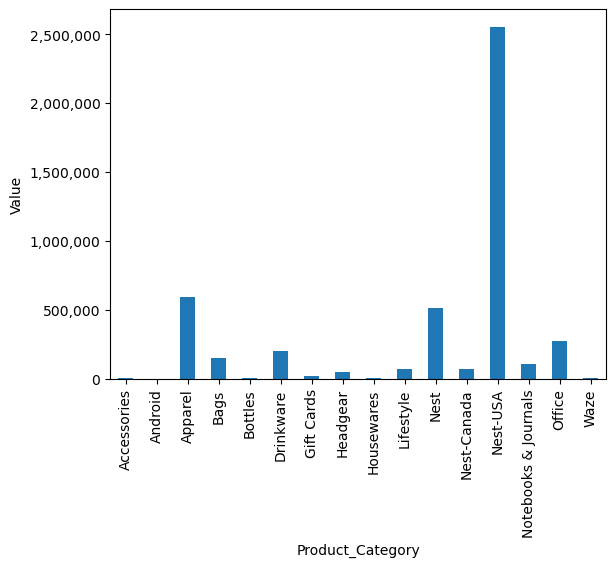

In [6]:
from matplotlib.ticker import FixedLocator, FixedFormatter



product = online_shop3.groupby(by = 'Product_Category',as_index=True).TotalPrice.sum()

shop = product.plot(kind='bar')
y_ticks = [f'{val:,.0f}' for val in shop.get_yticks()]
shop.yaxis.set_major_locator(FixedLocator(shop.get_yticks()))
shop.yaxis.set_major_formatter(FixedFormatter(y_ticks))

shop.set_ylabel('Value')
plt.show()

In [7]:
#is there a correlation between coupons and sales? or delivery charges and sales?

C:\Users\User\AppData\Local\Temp\ipykernel_6424\3159852289.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online_shop3['Coupon_Status'] =online_shop3['Coupon_Status'].replace({'Clicked':'Used'})


<Axes: xlabel='Coupon_Status'>

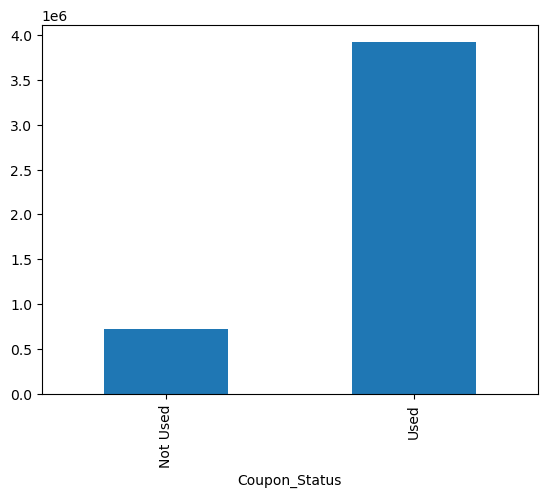

In [8]:
#some value addition - joining the clicked with used status
online_shop3['Coupon_Status'] =online_shop3['Coupon_Status'].replace({'Clicked':'Used'})

online_shop3.groupby(by = 'Coupon_Status',as_index=True).TotalPrice.sum().plot(kind='bar')


In [9]:
#Which products are often sold together 
new_df = online_shop3[online_shop3['CustomerID'].duplicated(keep = False)
                ]
new_df['Grouped']=new_df.groupby('CustomerID')['Product_Description'].transform(lambda x:','.join(x))

new_df = new_df[['CustomerID', 'Grouped']].drop_duplicates()
new_df

C:\Users\User\AppData\Local\Temp\ipykernel_6424\1182755292.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Grouped']=new_df.groupby('CustomerID')['Product_Description'].transform(lambda x:','.join(x))


,CustomerID,Grouped
0,17850.0,Nest Learning Thermostat 3rd Gen-USA - Stainle...
23,13047.0,"Nest Cam Outdoor Security Camera - USA,Nest Pr..."
27,12583.0,"Nest Cam Indoor Security Camera - USA,Android ..."
28,15100.0,Nest Learning Thermostat 3rd Gen-USA - Stainle...
29,14688.0,Nest Learning Thermostat 3rd Gen-USA - Stainle...
...,...,...
49176,12935.0,"Google Doodle Decal,Android BTTF Moonshot Grap..."
49240,12609.0,"Keyboard DOT Sticker,Keyboard DOT Sticker,Goog..."
49404,16660.0,"Keyboard DOT Sticker,Google Twill Cap,Google S..."
49896,14248.0,"Google Women's Scoop Neck Tee Black,Google Wom..."


In [10]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in new_df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
for key, value in count.most_common(10):
    print(key,value)

('Nest Learning Thermostat 3rd Gen-USA - Stainless Steel', 'Nest Learning Thermostat 3rd Gen-USA - Stainless Steel') 13770
('Nest Learning Thermostat 3rd Gen-USA - Stainless Steel', 'Nest Cam Outdoor Security Camera - USA') 13408
('Nest Learning Thermostat 3rd Gen-USA - Stainless Steel', 'Nest Cam Indoor Security Camera - USA') 12643
('Nest Cam Outdoor Security Camera - USA', 'Nest Learning Thermostat 3rd Gen-USA - Stainless Steel') 11289
('Nest Cam Indoor Security Camera - USA', 'Nest Cam Outdoor Security Camera - USA') 11285
('Nest Cam Indoor Security Camera - USA', 'Nest Learning Thermostat 3rd Gen-USA - Stainless Steel') 11154
('Nest Cam Outdoor Security Camera - USA', 'Nest Cam Outdoor Security Camera - USA') 11045
('Nest Cam Outdoor Security Camera - USA', 'Nest Cam Indoor Security Camera - USA') 10655
('Nest Cam Indoor Security Camera - USA', 'Nest Cam Indoor Security Camera - USA') 10445
('Nest Learning Thermostat 3rd Gen-USA - Stainless Steel', 'Google Sunglasses') 8493
